### Exploratory Data Analysis
    

In [1]:
import pandas as pd

# Define the path to the data folder
from pathlib import Path

# Define the path to the data folder
data_folder = Path("data").resolve()

# Define the path to the current folder
current_folder = Path(".").resolve()

data_file = data_folder / 'credit.csv'
df = pd.read_csv(data_file)
df = df.rename(columns={'Unnamed: 0':'observation_id'})

## Observations & Conclusions based on EDA

### Nature of the Problem
The problem is an imbalanced classification problem. This means that the data is biased towards one class (non-defaulters) and is imbalanced with respect to the other class (defaulters).

### Missing Values
- It is not clear if this dataset relates to Fairmoney lending funnel and the data it collects.

- Telephone: Although the length of the telephone number is accurate for a mobile phone, there is no sign of a German prefix. It is assumed that a telephone is private information and without the specific consent of the client, a company cannot use this data. Therefore, missing value imputation can be with zeros.

- Checking balance has almost 40% of missing values. If this data was a real representation of the funnel, there is a high probability that this might be a data collection error. Imputing this variable could add bias to the model.

- The rest of the variables can be imputed due to their nature of missingness. A person may not declare their residency history or personal status.

### Observations

- Negative values in checking balances could be a sign of default, but not entirely since a person can easily have negative     balances.

- The minimum loan duration is 4 months while the maximum is 6 years.

- The minimum age is 19, which is a good representation of reality.

- There are a few sensitive variables in the dataset, such as gender, foreign worker, and personal status.

- Distributions are mostly skewed.

- The majority of loans in this data fall between 10 and 30 months. There are some peaks of default between 15 and 35 months. 

- Loans with longer durations have evidence of more default in the data, such as loans with 50-month duration.

- There is potential evidence that younger people tend to default, but this needs to be handled carefully to avoid introducing bias to the model.

- Credit history is somewhat self-explanatory, but the nature of the descriptions is not clear.

- Loans for education are most likely to default, with over 40% out of total loans, followed by other categories and categorical_vars.

- Personal status might be a sensitive variable to the model, although at first glance divorced people are more likely to default.

- Foreign_worker is a very sensitive variable, and from an ethics perspective, adding this to the model would only introduce bias and harm fairness.

- The logic of the variable job is not clear. Somehow, this variable is combining two natures, being a resident and being a skilled employee. There is one particular category that doesn't seem ethical, which is "unemployed non-resident."

- Gender is also a sensitive variable and could introduce bias to a model. In this particular dataset, females are more likely to default.

<AxesSubplot:ylabel='Frequency'>

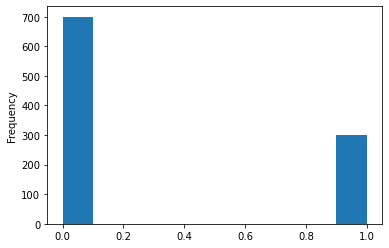

In [2]:
df.default.plot.hist()

In [3]:
from src.preprocessing.eda import Eda

eda = Eda()

eda.missing_values_table(df)


The selected dataframe has 23 columns and 6 columns with missing values.


,Missing Values,% of Total Values
telephone,596,59.6
checking_balance,394,39.4
personal_status,310,31.0
savings_balance,183,18.3
residence_history,130,13.0
employment_length,62,6.2


In [4]:
# Change dtypes 
df['observation_id'] = df['observation_id'].astype('object')
df['telephone'] = df['telephone'].astype('object')

In [5]:
df.describe()

,checking_balance,months_loan_duration,amount,savings_balance,installment_rate,age,existing_credits,default,dependents
count,606.000000,1000.000000,1000.000000,817.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,97.245875,20.903000,3271.258000,781.570379,2.973000,35.546000,1.407000,0.300000,1.155000
std,206.923583,12.058814,2822.736876,3016.983785,1.118715,11.375469,0.577654,0.458487,0.362086
min,-50.000000,4.000000,250.000000,0.000000,1.000000,19.000000,1.000000,0.000000,1.000000
25%,-23.000000,12.000000,1365.500000,31.000000,2.000000,27.000000,1.000000,0.000000,1.000000
50%,24.000000,18.000000,2319.500000,64.000000,3.000000,33.000000,1.000000,0.000000,1.000000
75%,131.750000,24.000000,3972.250000,128.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,999.000000,72.000000,18424.000000,19972.000000,4.000000,75.000000,4.000000,1.000000,2.000000


In [23]:
df.describe(include='object')

,observation_id,credit_history,purpose,employment_length,personal_status,other_debtors,residence_history,property,installment_plan,housing,telephone,foreign_worker,job,gender
count,1000,1000,1000,938,690,1000,870,1000,1000,1000,4.040000e+02,1000,1000,1000
unique,1000,5,10,31,3,3,36,4,3,3,4.040000e+02,2,4,2
top,0,repaid,radio/tv,1 years,single,none,2 years,other,none,own,2.349340e+09,yes,skilled employee,male
freq,1,530,280,122,548,907,43,332,814,713,1.000000e+00,963,630,690


In [3]:
from src.preprocessing.process_transform import Preprocess

preprocess = Preprocess()

df = preprocess.basic_transformation(df)

In [6]:
from src.preprocessing.eda import Eda

eda= Eda()
plot_num = eda.plot_distribution_comp
var = ['checking_balance','months_loan_duration','amount', 'savings_balance', 'installment_rate','age', 'existing_credits', 'dependents', 'employment_length_months', 'residence_history_months' ]



<Figure size 432x288 with 0 Axes>

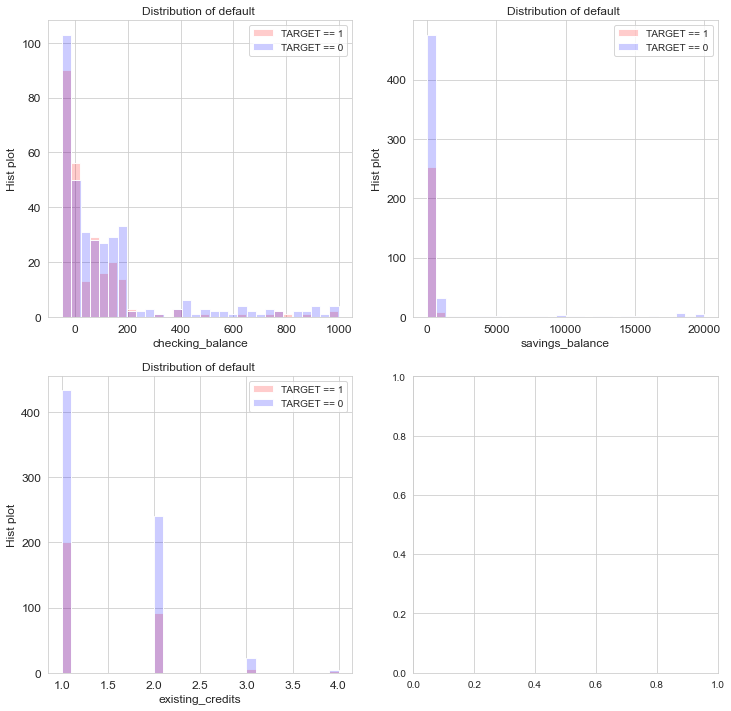

In [7]:
# Plot account related variables
var = ['checking_balance', 'savings_balance', 'existing_credits']
plot_num(df, 'default',var,nrow=2)

<Figure size 432x288 with 0 Axes>

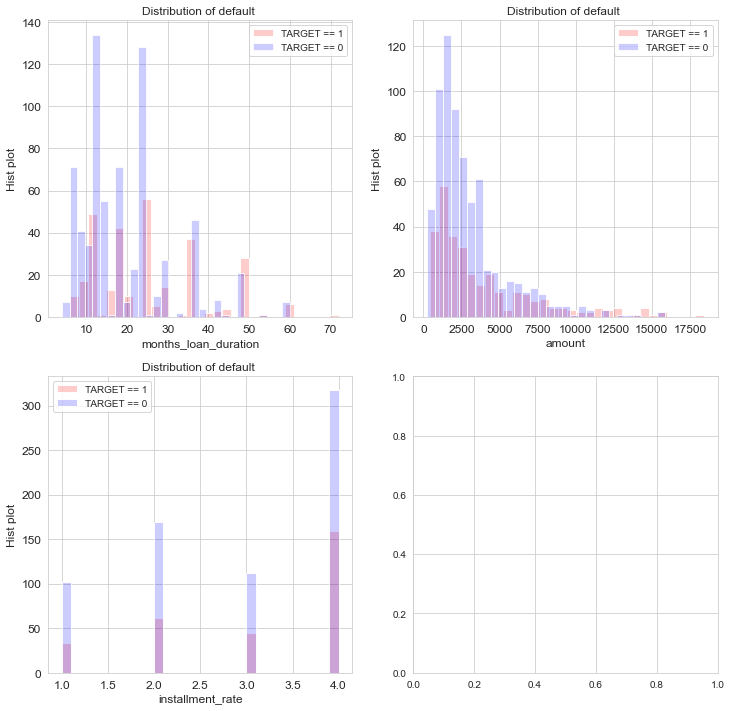

In [8]:
# Plot loan related variables

var = ['months_loan_duration','amount', 'installment_rate' ]
plot_num(df, 'default', var, nrow=2 )

<Figure size 432x288 with 0 Axes>

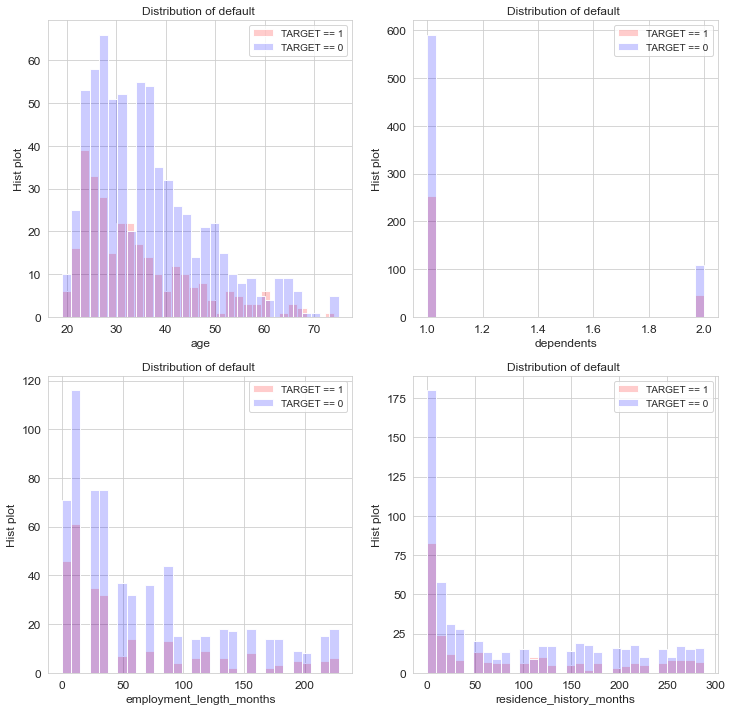

In [9]:
# Declared personal data plots
var = ['age', 'dependents', 'employment_length_months', 'residence_history_months' ]
plot_num(df, 'default', var, nrow=2)

In [12]:
plot_cat = eda.plot_cat_feature

/Users/servandodavidtorresgarcia/Servando/personal-pipeline/src/preprocessing/eda.py:91: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


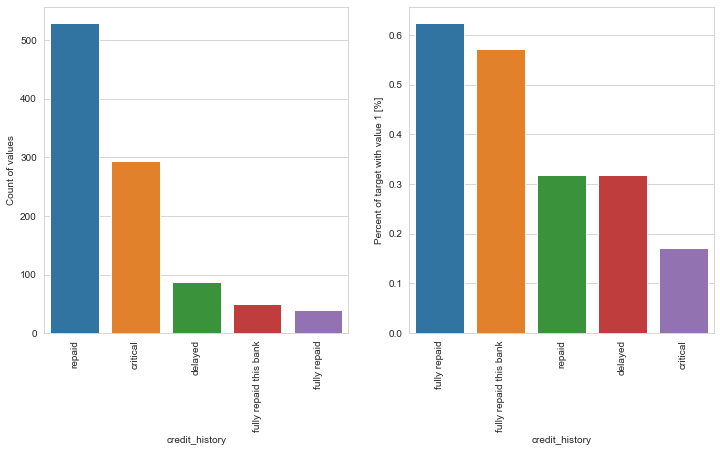

In [13]:
plot_cat(df, 'credit_history', 'default', True)

/Users/servandodavidtorresgarcia/Servando/personal-pipeline/src/preprocessing/eda.py:91: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


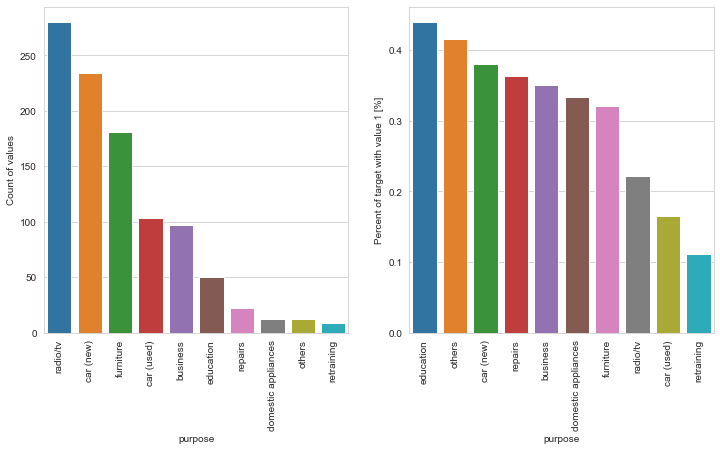

In [14]:
plot_cat(df, 'purpose', 'default', True)

/Users/servandodavidtorresgarcia/Servando/personal-pipeline/src/preprocessing/eda.py:91: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


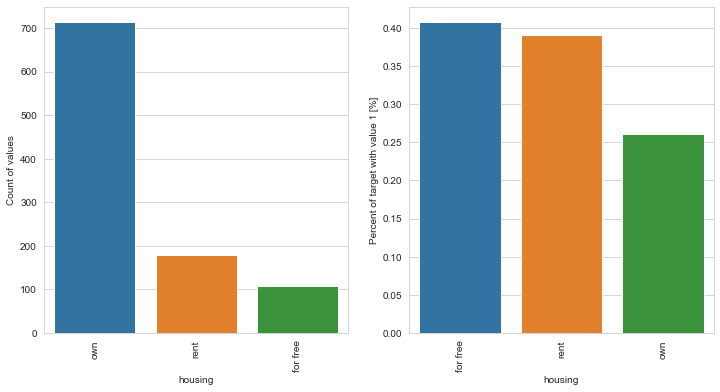

In [15]:
plot_cat(df, 'housing', 'default', True)

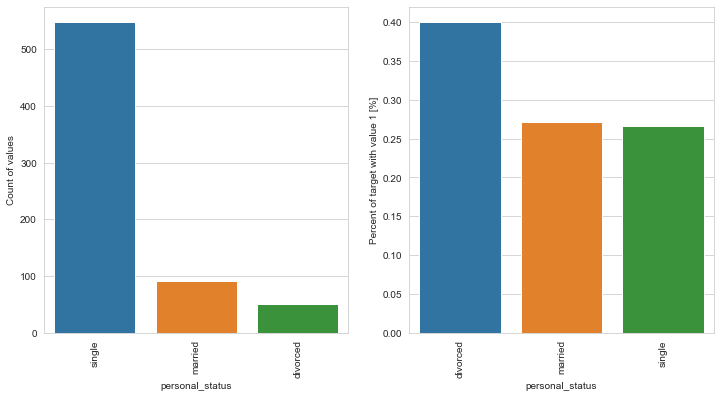

In [59]:
plot_cat(df, 'personal_status', 'default', True)

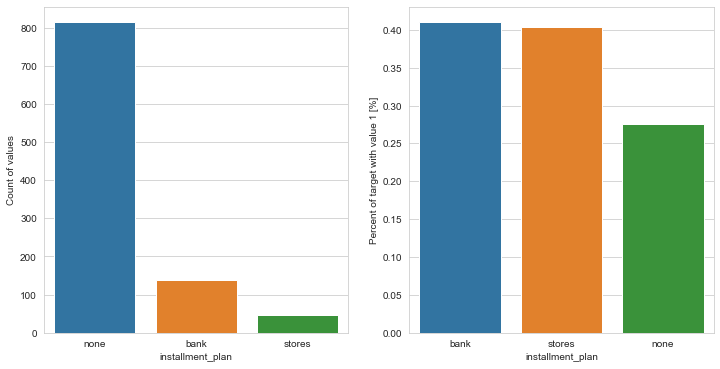

In [61]:
plot_cat(df, 'installment_plan', 'default', False)

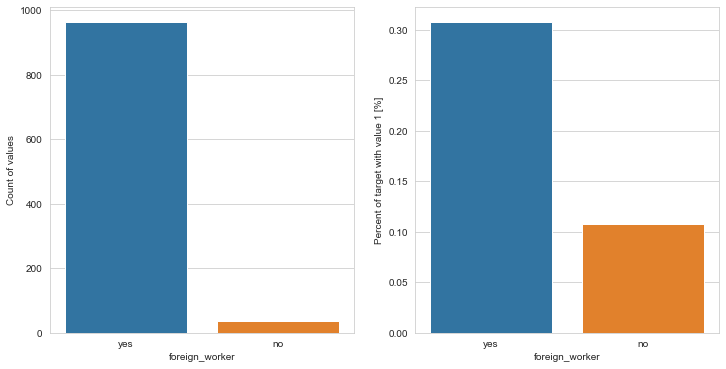

In [63]:
plot_cat(df, 'foreign_worker', 'default', False)

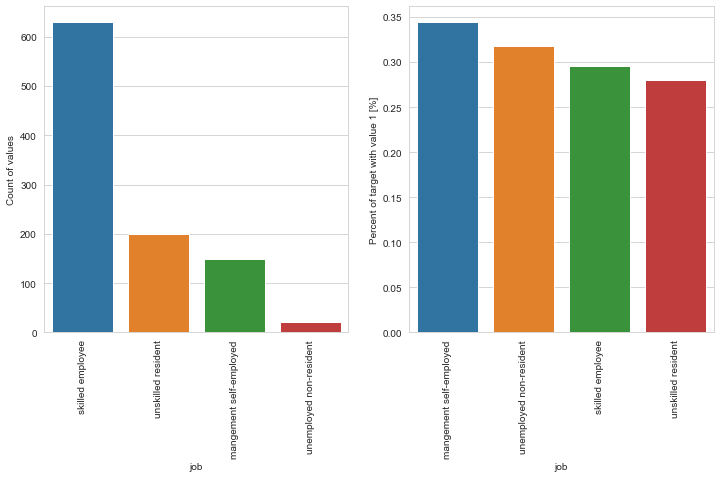

In [65]:
plot_cat(df, 'job', 'default', True
)

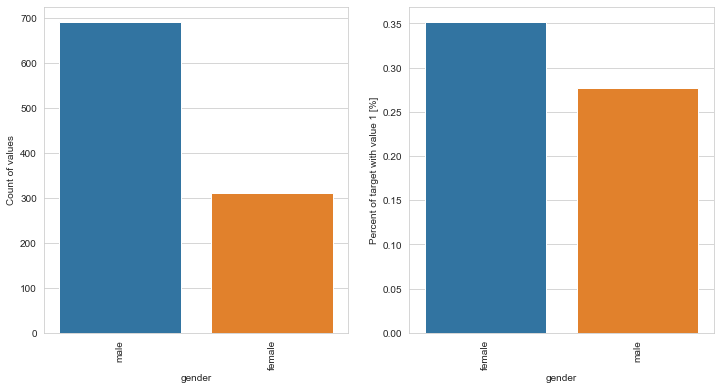

In [66]:
plot_cat(df, 'gender', 'default', True
)

Text(0.5, 1.0, 'Correlated features before feature engineering  [default]')

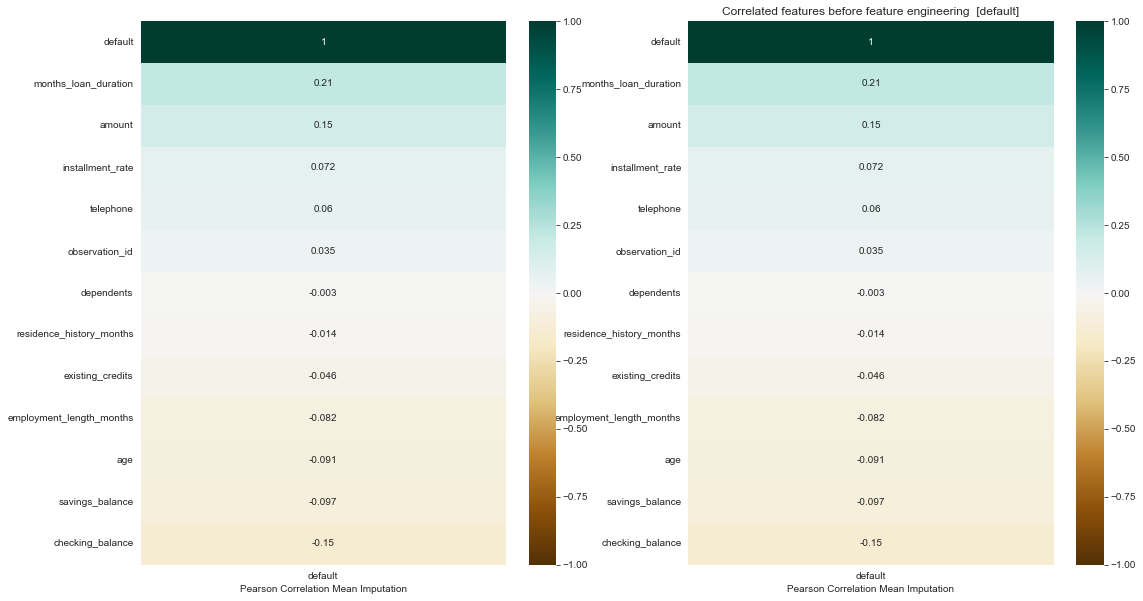

In [16]:
# Plot the proportions on separate bar charts
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

sns.heatmap(df.corr()[['default']].sort_values(by='default', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax1)

sns.heatmap(df.corr()[['default']].sort_values(by='default', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax2)

ax1.set_xlabel('Pearson Correlation Mean Imputation')

ax2.set_xlabel('Pearson Correlation Mean Imputation')

plt.title('Correlated features before feature engineering  [default]', loc='center', )